In [3]:
# Importing Dependencies and Setup
# We don't know what we need, so we'll import a bunch of different modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

In [5]:
# Load CSV file and turn it into PD DataFrames
goOne_df = pd.read_csv("Resources/goemotions_1.csv")
goTwo_df = pd.read_csv("Resources/goemotions_2.csv")
goThree_df = pd.read_csv("Resources/goemotions_3.csv")

In [6]:
# Merge the three separate DataFrames into one.
dfMerge = goOne_df.merge(goTwo_df, how='outer')
dfMerge = dfMerge.merge(goThree_df, how='outer')

# Convert column into DateTime datatype, and apply the correct unit (seconds) to turn it readable.
dfMerge['created_utc'] = dfMerge['created_utc'].astype('datetime64[s]')
dfMerge

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,2019-01-25 01:50:39,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,2019-01-21 15:22:49,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,2019-01-02 11:15:44,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,2019-01-20 06:17:34,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,2019-01-05 06:10:01,2,False,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211220,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,2019-01-16 10:25:22,16,False,0,...,1,0,0,0,0,0,0,0,0,0
211221,Well when you’ve imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,2019-01-27 01:39:42,15,False,0,...,0,0,0,0,0,0,0,0,0,0
211222,That looks amazing,ee8hse1,springt1me,shittyfoodporn,t3_agrnqb,t3_agrnqb,2019-01-17 00:08:54,70,False,1,...,0,0,0,0,0,0,0,0,0,0
211223,The FDA has plenty to criticize. But like here...,edrhoxh,enamedata,medicine,t3_aejqzd,t1_edrgdtx,2019-01-11 01:07:12,4,False,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Clean DataFrame by: 1.# Dropping columns, 2.) Choosing "Clear" selections, 3.) Dropping the "example_very_unclear" column after selection
dfStaging = dfMerge.drop(columns=['id', 'author', 'link_id', 'parent_id'])
dfStagingA = dfStaging.loc[(dfStaging['example_very_unclear'] == False)]
dfClean = dfStagingA.drop(columns=['example_very_unclear'])
dfClean
# dfClean will have "clear" examples

,text,subreddit,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,nrl,2019-01-25 01:50:39,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,"You do right, if you don't care then fuck 'em!",confessions,2019-01-02 11:15:44,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,facepalm,2019-01-20 06:17:34,18,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",starwarsspeculation,2019-01-05 06:10:01,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Right? Considering it’s such an important docu...,TrueReddit,2019-01-23 21:50:08,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,"Well, I'm glad you're out of all that now. How...",raisedbynarcissists,2019-01-04 15:22:34,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211220,Everyone likes [NAME].,heroesofthestorm,2019-01-16 10:25:22,16,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
211221,Well when you’ve imported about a gazillion of...,nottheonion,2019-01-27 01:39:42,15,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
211222,That looks amazing,shittyfoodporn,2019-01-17 00:08:54,70,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Clean DataFrame by: 1.# Dropping columns, 2.) Choosing "Unclear" selections, 3.) Dropping the "example_very_unclear" column after selection
# Same as above; 
dfStagingB = dfStaging.loc[(dfStaging['example_very_unclear'] == True)]
dfEVUClean = dfStagingB.drop(columns=['example_very_unclear'])
dfEVUClean
# dfEVUClean will have "unclear" examples

,text,subreddit,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
1,>sexuality shouldn’t be a grouping category I...,unpopularopinion,2019-01-21 15:22:49,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,Oi us cancers don’t want him either! We respec...,Justfuckmyshitup,2019-01-13 22:13:56,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,I unfortunately can not afford a lawyer. Lucki...,Divorce,2019-01-01 17:28:15,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,OMG THOSE TINY SHOES! *desire to boop snoot in...,chicago,2019-01-20 05:36:33,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,I would pay money for [NAME] to not be my nurs...,SoulCalibur,2019-01-17 03:50:29,22,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211037,_____ is ruining _____ because kids these days.,moviescirclejerk,2019-01-10 23:51:59,57,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211082,"yea I agree, and [NAME] is way younger so has ...",Dodgers,2019-01-04 22:09:22,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211113,"Huh, assumed he was more of a grindr fella .....",90dayfianceuncensored,2019-01-30 23:05:53,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
211214,Well when you’ve imported about a gazillion of...,nottheonion,2019-01-27 01:39:42,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
dfEVUTrue = dfMerge.loc[dfMerge['example_very_unclear'] == True]

In [11]:
dfEmotions = dfClean

In [15]:
# applying Numpy.select to the clean dataframe which will scan selected columns based on conditions and output the sentiments for each emotion selected
# dfClean
emo_conditions = [
    (dfEmotions['amusement'] == 1),
    (dfEmotions['excitement'] == 1),
    (dfEmotions['joy'] == 1),
    (dfEmotions['love'] == 1),
    (dfEmotions['desire'] == 1),
    (dfEmotions['optimism'] == 1),
    (dfEmotions['caring'] == 1),
    (dfEmotions['pride'] == 1),
    (dfEmotions['admiration'] == 1),
    (dfEmotions['gratitude'] == 1),
    (dfEmotions['relief'] == 1),
    (dfEmotions['approval'] == 1),
    (dfEmotions['realization'] == 1),
    (dfEmotions['surprise'] == 1),
    (dfEmotions['curiosity'] == 1),
    (dfEmotions['confusion'] == 1),
    (dfEmotions['fear'] == 1),
    (dfEmotions['nervousness'] == 1),
    (dfEmotions['remorse'] == 1),
    (dfEmotions['embarrassment'] == 1),
    (dfEmotions['disappointment'] == 1),
    (dfEmotions['sadness'] == 1),
    (dfEmotions['grief'] == 1),
    (dfEmotions['disgust'] == 1),
    (dfEmotions['anger'] == 1),
    (dfEmotions['annoyance'] == 1),
    (dfEmotions['disapproval'] == 1),
    (dfEmotions['neutral'] == 1)
]

sentiments = ['Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
              'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
               'Ambiguous', 'Ambiguous','Ambiguous','Ambiguous',
               'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
               'Negative', 'Negative', 'Negative', 'Negative', 'Neutral']

dfEmotions['Sentiment'] = np.select(emo_conditions, sentiments)
dfEmotions.head(50)

,text,subreddit,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,...,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,Sentiment
0,That game hurt.,nrl,2019-01-25 01:50:39,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Negative
2,"You do right, if you don't care then fuck 'em!",confessions,2019-01-02 11:15:44,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Neutral
3,Man I love reddit.,facepalm,2019-01-20 06:17:34,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
4,"[NAME] was nowhere near them, he was by the Fa...",starwarsspeculation,2019-01-05 06:10:01,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Neutral
5,Right? Considering it’s such an important docu...,TrueReddit,2019-01-23 21:50:08,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
6,"He isn't as big, but he's still quite popular....",cringe,2019-01-01 05:21:16,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Negative
7,That's crazy; I went to a super [RELIGION] hig...,TeenMomOGandTeenMom2,2019-01-03 17:22:38,23,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
8,that's adorable asf,traaaaaaannnnnnnnnns,2019-01-29 12:05:43,73,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
9,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",youtubehaiku,2019-01-08 21:38:34,54,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Positive
10,"I have, and now that you mention it, I think t...",AskMenOver30,2019-01-05 03:17:43,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Neutral


The rated emotions and their corresponding sentiments are as such:
 -------------------------------------------------- 
 Positive     82938
Neutral      55298
Negative     45991
Ambiguous    23587
Name: Sentiment, dtype: int64


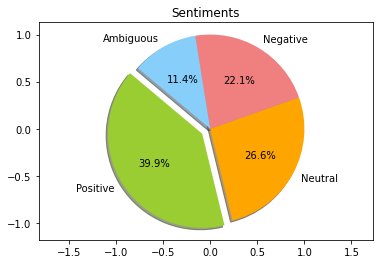

In [28]:
# Create list as variables for pie chart to dispay proportions of sentiments
sentiment_list = ["Positive", "Neutral", "Negative", "Ambiguous"]
sentiment_tally = [82938, 55298, 45991, 23587]
colors = ["yellowgreen", "orange", "lightcoral", "lightskyblue"]
explode = (0.1, 0, 0, 0)

# Create a pie chart using matplotlib based on the above data
sentiment_count = dfClean['Sentiment'].value_counts()
print("The rated emotions and their corresponding sentiments are as such:\n", 
"--------------------------------------------------","\n",
sentiment_count)
plt.pie(sentiment_count, explode=explode, labels=sentiment_list, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, frame=True)
plt.title("Sentiments")
plt.axis("equal")
plt.savefig("Resources/SentimentsPie.png")
plt.show()

In [31]:
# Adding another column to display the emotion chosen by the rater
emo_map_yin = [
    (dfEmotions['amusement'] == 1),
    (dfEmotions['excitement'] == 1),
    (dfEmotions['joy'] == 1),
    (dfEmotions['love'] == 1),
    (dfEmotions['desire'] == 1),
    (dfEmotions['optimism'] == 1),
    (dfEmotions['caring'] == 1),
    (dfEmotions['pride'] == 1),
    (dfEmotions['admiration'] == 1),
    (dfEmotions['gratitude'] == 1),
    (dfEmotions['relief'] == 1),
    (dfEmotions['approval'] == 1),
    (dfEmotions['realization'] == 1),
    (dfEmotions['surprise'] == 1),
    (dfEmotions['curiosity'] == 1),
    (dfEmotions['confusion'] == 1),
    (dfEmotions['fear'] == 1),
    (dfEmotions['nervousness'] == 1),
    (dfEmotions['remorse'] == 1),
    (dfEmotions['embarrassment'] == 1),
    (dfEmotions['disappointment'] == 1),
    (dfEmotions['sadness'] == 1),
    (dfEmotions['grief'] == 1),
    (dfEmotions['disgust'] == 1),
    (dfEmotions['anger'] == 1),
    (dfEmotions['annoyance'] == 1),
    (dfEmotions['disapproval'] == 1),
    (dfEmotions['neutral'] == 1)
]

emo_map_yang = ['Amusement', 'Excitement', 'Joy', 'Love', 'Desire', 'Optimism', 'Caring',
              'Pride', 'Admiration', 'Gratitude', 'Relief', 'Approval',
               'Realization', 'Surprise','Curiosity','Confusion',
               'Fear', 'Nervousness', 'Remorse', 'Embarrassment', 'Disappointment', 'Sadness', 'Grief',
               'Disgust', 'Anger', 'Annoyance', 'Disapproval', 'Neutral']
dfEmotions['Emotion'] = np.select(emo_map_yin, emo_map_yang)
dfClean.head()

,text,subreddit,created_utc,rater_id,admiration,amusement,anger,annoyance,approval,caring,...,optimism,pride,realization,relief,remorse,sadness,surprise,neutral,Sentiment,Emotion
0,That game hurt.,nrl,2019-01-25 01:50:39,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,Negative,Sadness
2,"You do right, if you don't care then fuck 'em!",confessions,2019-01-02 11:15:44,37,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Neutral,Neutral
3,Man I love reddit.,facepalm,2019-01-20 06:17:34,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Love
4,"[NAME] was nowhere near them, he was by the Fa...",starwarsspeculation,2019-01-05 06:10:01,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,Neutral,Neutral
5,Right? Considering it’s such an important docu...,TrueReddit,2019-01-23 21:50:08,61,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Positive,Gratitude


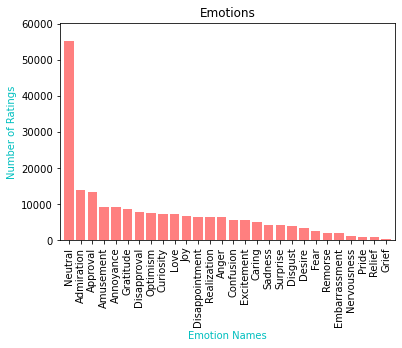

In [32]:
# Find the number of ratings for all emotions rated (including neutral ratings)
emotion_count = dfEmotions['Emotion'].value_counts()
# emotion_count = pd.DataFrame(emotion_count)

# Situate the 'emotion_count' dataframe into a bar chart
x_axis = np.arange(len(emotion_count)) 
plt.bar(x_axis, emotion_count, color='r', alpha=0.5, align="center")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(emotion_count)+5000)
plt.title("Emotions")
plt.xlabel("Emotion Names")
plt.ylabel("Number of Ratings")  
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Neutral', 'Admiration', 'Approval', 'Amusement', 'Annoyance', 'Gratitude', 'Disapproval',
              'Optimism', 'Curiosity', 'Love', 'Joy', 'Disappointment',
               'Realization', 'Anger','Confusion','Excitement',
               'Caring', 'Sadness', 'Surprise', 'Disgust', 'Desire', 'Fear', 'Remorse',
               'Embarrassment', 'Nervousness', 'Pride', 'Relief', 'Grief'])
plt.xticks(rotation = 90)
plt.show()

In [34]:
SubredditCatdf = pd.read_csv("CountsSubredditCat.csv")
SubredditCatdf = 

,Subreddit,Responses,Grouping,Subscribers,Notes,77,Discussion,"""General"" discussion"
0,cringe,895,emotive,1343888,NaN,63.0,Emotive,Aimed to evoke specific emotion
1,loveafterlockup,870,television movie,76887,NaN,36.0,Television Movie,Relating to TV or movie
2,socialanxiety,861,discussion,373806,NaN,49.0,Games,Relating to games
3,AnimalsBeingBros,827,emotive,6593398,NaN,17.0,Relationship,Relating to rom./ pla. relationship
4,OkCupid,817,relationship,244307,NaN,64.0,Sports,Relating to sports
...,...,...,...,...,...,...,...,...
478,hawks,130,sports,NaN,NaN,NaN,NaN,NaN
479,Anticonsumption,125,discussion,NaN,lifestyle?,NaN,NaN,NaN
480,SSBM,125,games,NaN,NaN,NaN,NaN,NaN
481,shieldbro,109,television movie,NaN,NaN,NaN,NaN,NaN
